# Experimental results
The following script was used to generate the plots shown in the handin. To recreate them one would need to download the data folder from github.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn
seaborn.set_theme()
plt.rcParams.update({'font.size': 14})
seaborn.set(font_scale = 1.5)

## Num levels 
Testing the impact of number of levels trained on.

In [ ]:
os.chdir(r'/content/drive/MyDrive/Colab Notebooks/Deep learning/Project/Data/num_levels')
reward = dict()
std = dict()
nature_dqn_training_time = []
impala_training_time = []

for folder_name in os.listdir():
    if folder_name.split('.')[-1] == 'txt':
        continue
    try:
      hyperparameters = pd.read_csv('./' + folder_name + '/hyperparams.csv')
    except:
      pass
    y = float(hyperparameters.eval_average_reward.item())
    x = hyperparameters.num_levels.item()
    s = hyperparameters.eval_std.item()
    nature_dqn_training_time.append(hyperparameters.training_time_min.item())
    reward[x] = y
    std[x] = s
    if x == 10:
        df10 = pd.read_csv('./' + folder_name + '/data.csv')
        hyper10 = pd.read_csv('./' + folder_name + '/hyperparams.csv')
    if x == 1000:
        df1000 = pd.read_csv('./' + folder_name + '/data.csv')
        hyper1000 = pd.read_csv('./' + folder_name + '/hyperparams.csv')


os.chdir(r'/content/drive/MyDrive/Project/Data/data_impala')
reward_impala = dict()
std_impala = dict()

for folder_name in os.listdir():
    if folder_name.split('.')[-1] == 'txt':
        continue
    try:
      hyperparameters = pd.read_csv('./' + folder_name + '/hyperparams.csv')
    except:
      pass
    y = float(hyperparameters.eval_average_reward.item())
    x = hyperparameters.num_levels.item()
    s = hyperparameters.eval_std.item()
    reward_impala[x] = y
    std_impala[x] = s
    impala_training_time.append(hyperparameters.training_time_min.item())
    if x == 10:
        df10_impala = pd.read_csv('./' + folder_name + '/data.csv')
        hyper10_impala = pd.read_csv('./' + folder_name + '/hyperparams.csv')
    if x == 1000:
        df1000_impala = pd.read_csv('./' + folder_name + '/data.csv')
        hyper1000_impala = pd.read_csv('./' + folder_name + '/hyperparams.csv')


from datetime import timedelta
print('NatureDQN average training time:',str(timedelta(minutes=np.array(nature_dqn_training_time).mean()))[:-6])
print('Impala average training time:',str(timedelta(minutes=np.array(impala_training_time).mean()))[:-6])


NatureDQN average training time: 2:54:33.
Impala average training time: 3:29:58.


In [ ]:
x = pd.DataFrame([reward]).T.reset_index()
std = pd.DataFrame([std]).T.reset_index()
x.columns = ['num_levels', 'reward']
std.columns = ['num_levels', 'std_']

x_impala = pd.DataFrame([reward_impala]).T.reset_index()
std_impala = pd.DataFrame([std_impala]).T.reset_index()
x_impala.columns = ['num_levels', 'reward']
std_impala.columns = ['num_levels', 'std_']

In [ ]:
x = x.sort_values('num_levels')
std = std.sort_values('num_levels')
x = x.drop(9)

x_impala = x_impala.sort_values('num_levels')
std_impala = std_impala.sort_values('num_levels')

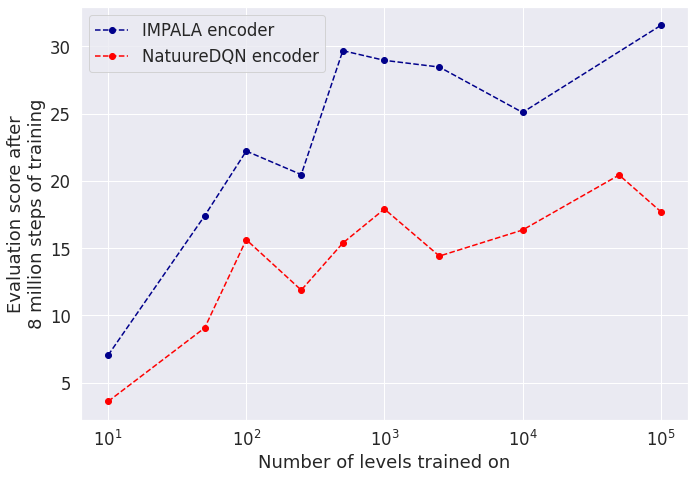

In [ ]:
plt.figure(figsize=(10,7))

#plt.scatter(x_impala.num_levels, x_impala.reward, zorder=100, label = 'IMPALA encoder', color = 'darkblue') #zorder - bring forward
plt.plot(x_impala.num_levels, x_impala.reward, marker = 'o', linestyle='--', label = 'IMPALA encoder', color = 'darkblue',zorder = 100)
plt.plot(x.num_levels, x.reward, marker = 'o', linestyle='--', label = 'NatuureDQN encoder', color = 'red')
plt.xscale('log')
#plt.fill_between(std.num_levels, x.reward.values + std.std_.values, x.reward.values - std.std_.values, 
#                 alpha = .1, color = 'red', label = 'std of evaluation')
plt.xlabel('Number of levels trained on')
plt.ylabel('Evaluation score after\n8 million steps of training')



#plt.fill_between(std_impala.num_levels, x_impala.reward.values + std_impala.std_.values, x_impala.reward.values - std_impala.std_.values, 
#                 alpha = .1, color = 'darkblue', label = 'std of evaluation')

plt.legend()
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Project/Figures/num_levels')
plt.show()

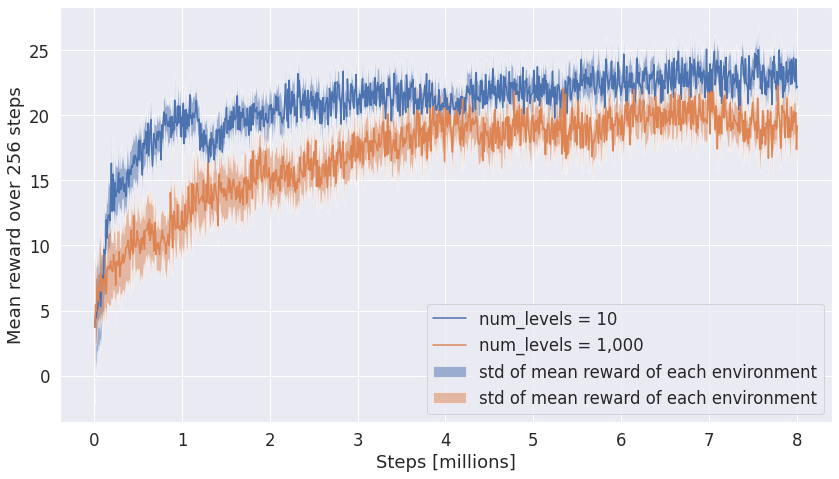

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(df10.step, df10.mean_reward, label = 'num_levels = 10', linewidth = 1.5)
plt.plot(df1000.step, df1000.mean_reward, label = 'num_levels = 1,000', linewidth = 1.5)
plt.fill_between(df10.step, df10.mean_reward + df10.std_reward, df10.mean_reward - df10.std_reward, alpha = 0.5,
                 label = 'std of mean reward of each environment')
plt.fill_between(df1000.step, df1000.mean_reward + df1000.std_reward, df1000.mean_reward - df1000.std_reward, alpha = 0.5,
                 label = 'std of mean reward of each environment')
#plt.fill_between(std.num_levels, x.reward.values + std.std_.values, x.reward.values - std.std_.values, alpha = .5, color = 'lightblue')
plt.xlabel('Steps [millions]')
plt.ylabel('Mean reward over 256 steps')
plt.legend(loc = 'lower right')
plt.xticks(list(np.arange(0,8e6+1,1e6)), list(np.arange(0,9,1)))
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Project/Figures/num_levels_training')
plt.show()

NatureDQN training time: 3:35:30.
IMPALA training time: 4:30:23.


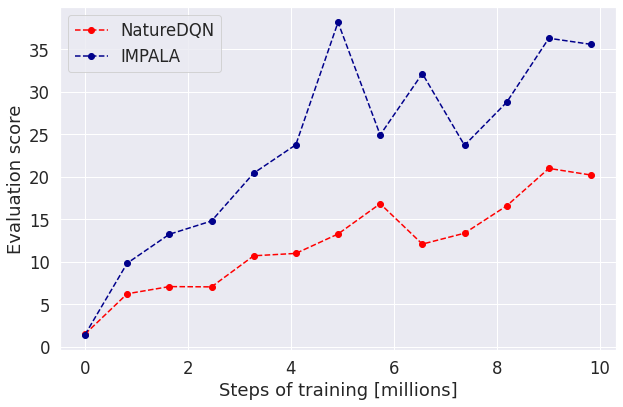

In [ ]:
color = {'NatureDQN': 'red',
         'IMPALA': 'darkblue'}
plt.figure(figsize=(9,6))
path = '/content/drive/MyDrive/Project/Data/nature_vs_impala'
os.chdir(path)
for folder in os.listdir():
    hyperparams = pd.read_csv('./'+folder+'/hyperparams.csv')
    eval = pd.read_csv('./'+folder+'/training_eval.csv')
    encoder = hyperparams.encoder.item()
    print(encoder,'training time:',str(timedelta(minutes=hyperparams.training_time_min.item()))[:-6])
    plt.plot(eval.step, eval.mean_reward, marker='o', linestyle='dashed', label = encoder, color = color[encoder])
    #plt.fill_between(eval.step, eval.mean_reward - eval.std_reward, 
     #                eval.mean_reward + eval.std_reward, alpha = .2)
plt.xlabel('Steps of training [millions]')
plt.ylabel('Evaluation score')
#plt.xlim(0, eval.step.iloc[-1]+50e3)
plt.legend()
plt.xticks(list(np.arange(0,10e6+1,2e6)), list(np.arange(0,12,2)))
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Project/Figures/impala_vs_dqn')
plt.show()

In [ ]:
hyperparameters_nature = pd.read_csv('/content/drive/MyDrive/Project/Data/num_levels/Thu Dec 10 22%3A53%3A07 2020/hyperparams.csv')
df_nature = pd.read_csv('/content/drive/MyDrive/Project/Data/num_levels/Thu Dec 10 22%3A53%3A07 2020/data.csv')

hyperparameters_impala = pd.read_csv('/content/drive/MyDrive/Project/Data/data_impala/Fri Dec 11 08%3A52%3A13 2020/hyperparams.csv')
df_impala = pd.read_csv('/content/drive/MyDrive/Project/Data/data_impala/Fri Dec 11 08%3A52%3A13 2020/data.csv')

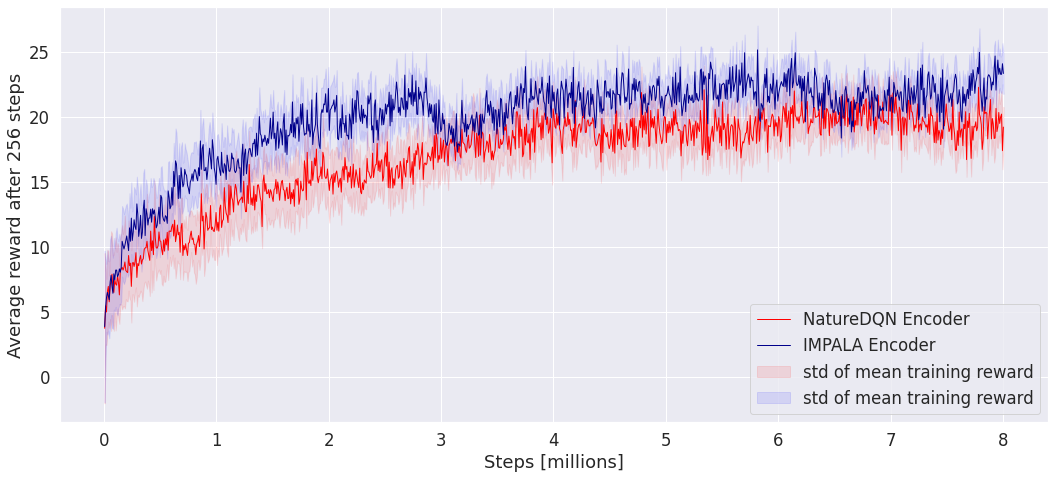

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(df_nature.step, df_nature.mean_reward, linewidth=1,color = 'red', label = 'NatureDQN Encoder')
plt.fill_between(df_nature.step, df_nature.mean_reward + df_nature.std_reward, df_nature.mean_reward - df_nature.std_reward, 
                 alpha = 0.1, label = 'std of mean training reward', color = 'red')


plt.plot(df_impala.step, df_impala.mean_reward, linewidth=1, color = 'darkblue', label = 'IMPALA Encoder')
plt.fill_between(df_impala.step, df_impala.mean_reward + df_impala.std_reward, df_impala.mean_reward - df_impala.std_reward, 
                 alpha = 0.1, label = 'std of mean training reward', color = 'blue')
plt.legend(loc = 'lower right')
plt.xlabel('Steps [millions]')
plt.ylabel('Average reward after 256 steps')
plt.xticks(list(np.arange(0,8e6+1,1e6)), list(np.arange(0,9,1)))
plt.tight_layout()
plt.show()

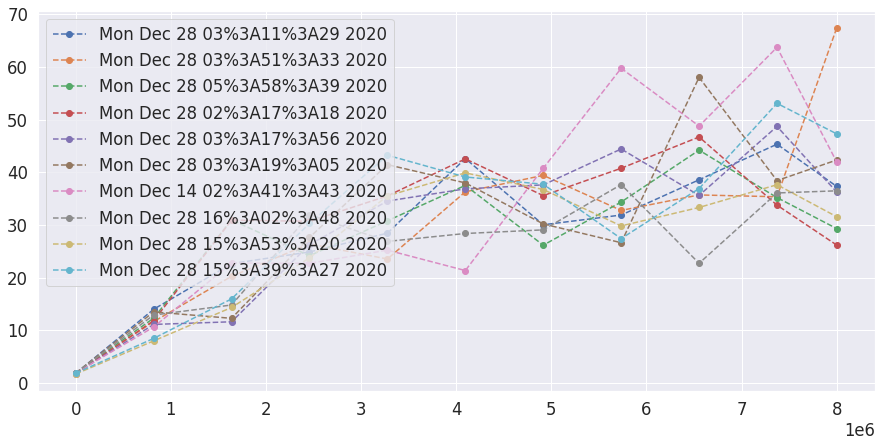

In [ ]:
os.chdir('/content/drive/MyDrive/Project/Data/impala_eps')
plt.figure(figsize=(15,7))
for folder in os.listdir():
  try:
    hyperparameters = pd.read_csv(folder + '/hyperparams.csv')
  except:
    continue
  training_eval = pd.read_csv(folder + '/training_eval.csv')
  # adding the last evaluation to the dataframe
  temp = hyperparameters[['total_steps', 'eval_std','eval_average_reward']]
  temp.columns = training_eval.columns
  training_eval = training_eval.append(temp)
  plt.plot(training_eval.step, training_eval.mean_reward, marker = 'o', linestyle = '--',
          label = folder) # color = 'darkblue'
plt.legend()
plt.show()

The best is found from Mon Dec 28 03:51 which we plot by itself.

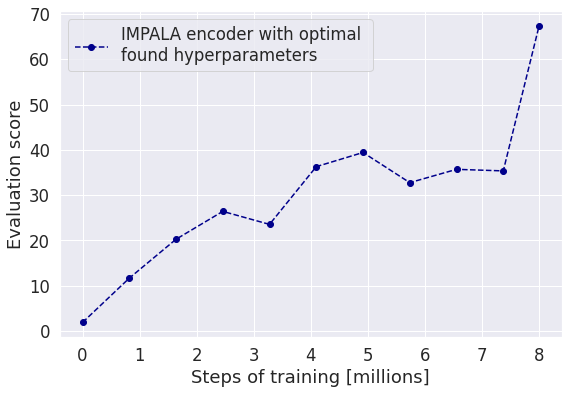

In [ ]:
folder = '/content/drive/MyDrive/Project/Data/impala_eps/Mon Dec 28 03%3A51%3A33 2020'
hyperparameters = pd.read_csv(folder + '/hyperparams.csv')
training_eval = pd.read_csv(folder + '/training_eval.csv')
# adding the last evaluation to the dataframe
temp = hyperparameters[['total_steps', 'eval_std','eval_average_reward']]
temp.columns = training_eval.columns
training_eval = training_eval.append(temp)

plt.figure(figsize=(9,6))
plt.plot(training_eval.step, training_eval.mean_reward, marker = 'o', linestyle = '--',
        label = 'IMPALA encoder with optimal \nfound hyperparameters', color = 'darkblue')
plt.legend(loc = 'upper left')
plt.xlabel('Steps of training [millions]')
plt.ylabel('Evaluation score')
plt.xticks(list(np.arange(0,8e6+1,1e6)), list(np.arange(0,9,1)))
plt.savefig('/content/drive/MyDrive/Project/Figures/optimal')
plt.show()

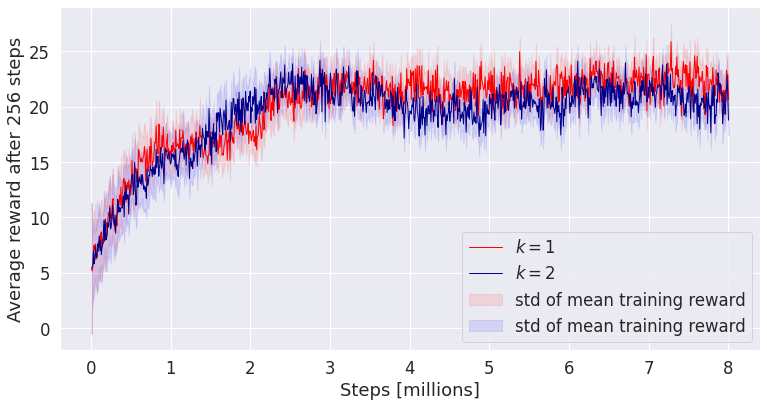

In [ ]:
hyperparameters_impala1 = pd.read_csv('/content/drive/MyDrive/Project/Data/impala_versioner/Fri Dec 11 22%3A30%3A03 2020/hyperparams.csv')
df_impala1 = pd.read_csv('/content/drive/MyDrive/Project/Data/impala_versioner/Fri Dec 11 22%3A30%3A03 2020/data.csv')

hyperparameters_impala2 = pd.read_csv('/content/drive/MyDrive/Project/Data/impala_versioner/Sat Dec 12 00%3A07%3A53 2020/hyperparams.csv')
df_impala2 = pd.read_csv('/content/drive/MyDrive/Project/Data/impala_versioner/Sat Dec 12 00%3A07%3A53 2020/data.csv')

ax = plt.figure(figsize=(11,6))
plt.plot(df_impala1.step, df_impala1.mean_reward, linewidth=1,color = 'red', label = '$k=1$')
plt.fill_between(df_impala1.step, df_impala1.mean_reward + df_impala1.std_reward, df_impala1.mean_reward - df_impala1.std_reward, 
                 alpha = 0.1, label = 'std of mean training reward', color = 'red')


plt.plot(df_impala2.step, df_impala2.mean_reward, linewidth=1, color = 'darkblue', label = '$k=2$')
plt.fill_between(df_impala2.step, df_impala2.mean_reward + df_impala2.std_reward, df_impala2.mean_reward - df_impala2.std_reward, 
                 alpha = 0.1, label = 'std of mean training reward', color = 'blue')
plt.legend(loc = 'lower right')
plt.xlabel('Steps [millions]')
plt.ylabel('Average reward after 256 steps')
plt.xticks(list(np.arange(0,8e6+1,1e6)), list(np.arange(0,9,1)))
plt.tight_layout()
plt.show()